# Exploring the Latent Space

### example of loading the generator model and generating images by exploring the latent space

# Google Drive

In [1]:
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    COLAB = True
    print("Note: using Google CoLab")
    %tensorflow_version 2.x
except:
    print("Note: not using Google CoLab")
    COLAB = False
    
%cd drive/My Drive/projects/GDL_code

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
Note: using Google CoLab
/content/drive/My Drive/projects/GDL_code


## imports

In [0]:
from numpy import asarray
from numpy.random import randn
from numpy.random import randint
from numpy import linspace
from matplotlib import pyplot

from utils.loaders import load_model
from models.GAN import GAN
import os


In [0]:
# run params
SECTION = 'gan'
RUN_ID = '0001'
DATA_NAME = 'camel'
RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])

if not os.path.exists(RUN_FOLDER):
    os.mkdir(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, 'viz'))
    os.mkdir(os.path.join(RUN_FOLDER, 'images'))
    os.mkdir(os.path.join(RUN_FOLDER, 'weights'))

#mode = 'load' #'build' #

## generate points in latent space

In [0]:
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
  # generate points in the latent space
  x_input = randn(latent_dim * n_samples)
  # reshape into a batch of inputs for the network
  z_input = x_input.reshape(n_samples, latent_dim)
  print(z_input.shape)
  return z_input

## uniform interpolation

In [0]:
# uniform interpolation between two points in latent space
def interpolate_points(p1, p2, n_steps=10):
  # interpolate ratios between the points
	ratios = linspace(0, 1, num=n_steps)
	# linear interpolate vectors
	vectors = list()
	for ratio in ratios:
		v = (1.0 - ratio) * p1 + ratio * p2
		vectors.append(v)
	return asarray(vectors)

## create a plot of generated images

In [0]:
# create a plot of generated images
def plot_generated(examples, n):
  fig = pyplot.figure(figsize=(25, 25))
  fig.subplots_adjust(hspace=0.1, wspace=0.1)
  # plot images
  for i in range(n):
   # define subplot
   #pyplot.subplot(1, n, 1 + i)
   img = examples[i, :, :]
   ax = fig.add_subplot(1, n, i+1)
   # turn off axis
   ax.axis('off')
   # plot raw pixel data
   ax.imshow(img)
  pyplot.show()

## load model & generate images

(2, 100)
(20, 28, 28, 1)
(20, 28, 28)


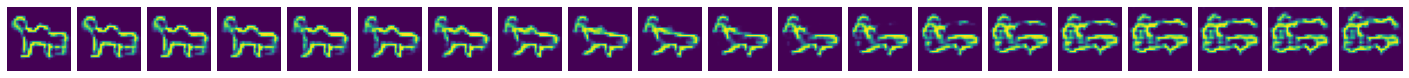

In [124]:
# load model
model = load_model(GAN, RUN_FOLDER)
# generate latent points
latent_points = generate_latent_points(100, 2)
# interpolate points in latent space
interpolated = interpolate_points(latent_points[0], latent_points[1], n_steps=20)
# generate images
X  = model.generator.predict(interpolated)
# scale from [-1,1] to [0,1]
X = (X + 1) / 2.0
print(X.shape)
# get ride of last dimension (num channels) as it is not needed
X = X[:,:,:,0]
print(X.shape)
# plot the result
#plot_generated(X, 5)
plot_generated(X, len(interpolated))

In [15]:
str = "{}/weights/weights.h5".format(RUN_FOLDER)
print(str)

run/gan/0001_camel/weights/weights.h5
